In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## Bayesian Framework can be extended to inference of model parameters given data.


The diachronic interpretation of Bayes theorem:

A new way to think of Bayes’s theorem: it gives us a way to update the probability of a hypothesis, $H$, given some observed data, $D$.

$$P(H \mid D) = \frac{P(H)P(D \mid H)}{P(D)}$$

In this interpretation, each term has a name:

- $P(H)$ is the probability of the hypothesis before we see the data, called the prior probability, or just prior.
- $P(H \mid D)$ is the probability of the hypothesis after we see the data, called the posterior.
- $P(D \mid H)$ is the probability of the data under the hypothesis, called the likelihood.
- $P(D)$ is the total probability of the data, under any hypothesis.


Now, imagine that we have a probability distribution $P(X \mid \lambda)$ that depends on a parameter $\lambda$.

Given a sequence of observations of $x$, how do we find $\lambda$?

### Our Bayesian inference framework gives us a natural solution

Now, we consider the parameters associated with the model to be random variables.

$$P(X, \lambda) = P(X \mid \lambda)P(\lambda) = P(X)P(\lambda \mid X)$$

and

$$P(\lambda \mid X) = \frac{P(X \mid \lambda)P(\lambda)}{P(X)}$$

where $\lambda$ takes values in a domain that is commonly continuous e.g. $\lambda \in \mathbb{R}$.


We will proceed as always: 

Take the log and construct prior, likelihood and posterior.

### Examples: Poisson parameter inference... Problem Set

Consider

$$P(X \mid \lambda) = \frac{e^{-\lambda}\lambda^x}{x!}$$

and we observe a single event $x_1$ and we hope to infer $\lambda$.

Let's assume we have a uniform prior $P(\lambda)$ and construct the log-likelihood:

$$\log P(\lambda \mid X) = \log P(X \mid \lambda) + \log P(\lambda) - \log P(X)$$

Remember $\log P(X)$ and the uniform prior don't depend on $\lambda$. So we will omit them.


$$\begin{eqnarray}
\log P(\lambda \mid X) &=& \log P(X \mid \lambda) \\
&=& \log \frac{e^{-\lambda}\lambda^x}{x!} \\
&=&  - \lambda + x\log \lambda - \log x!
\end{eqnarray}$$

Let's find the critical point of the likelihood function by setting the first derivative (with respect to $\lambda$) of the likelihood function to zero.

$$\frac{d}{d\lambda}[P(\lambda \mid X)] = -1 + \frac{x}{\lambda} = 0$$

$$\lambda = x$$






### How to combine multiple observations?

Imagine that we have a set of measurements $X = \{x_i\}$ now we want to find the posterior probability of $\lambda$ given $X$. We consider:

$$P(\lambda \mid x_1, x_2) = \frac{P(x_1, x_2 \mid \lambda) P(\lambda)}{P(x_1, x_2) } $$

We will assume that each observation is independent and identically distributed (i.i.d.).

Therefore:

$$P(x_1, x_2 \mid \lambda) = P(x_1 \mid \lambda)P(x_2 \mid \lambda)$$

Given a set of observations $X = \{x_i\}$ we want to find the posterior probability of $\lambda$ given $X$. (We will omit $P(x_1,x_2,\ldots,x_i)$ and assume uniform prior).

$$\begin{eqnarray}
P(\lambda \mid x_1, x_2) &\propto& P(x_1,x_2 \mid \lambda) \\
&=& P(x_1 \mid \lambda)P(x_2 \mid \lambda)
\end{eqnarray}$$

In general, given a set of observations $X = \{x_i\}$ now we want to find the posterior probability of $\lambda$ given $X$. We consider:

$$\begin{eqnarray}
P(\lambda \mid x_1, x_2, \ldots, x_i) &\propto& \prod_{i}P(x_i \mid \lambda) \\
\log P(\lambda \mid x_1, x_2, \ldots, x_i) &\propto& \sum_{i} \log P(x_i \mid \lambda) 
\end{eqnarray}$$

If we have $n$ measurements $x_i$ , we have:

$$\begin{eqnarray}
\log L(\lambda) &=&  \sum_{i = 1}^{n} \log P(x_i \mid \lambda) \\ 
&=&  \sum_{i = 1}^{n} \log \frac{e^{-\lambda}\lambda^{x_i}}{x_i!}\\
&=&  \sum_{i = 1}^{n} -\lambda + x_i\log \lambda - \log x_i !\\
&=&  -n\lambda + \sum_{i = 1}^{n} \left(x_i\log \lambda - \log x_i !\right)
\end{eqnarray}$$

Let's find the critical point of the likelihood function:

$$\frac{d}{d\lambda}[L(\lambda)] = -n + \sum_{i = 1}^{n} \frac{x_i}{\lambda} = 0$$

$$\lambda = \frac{1}{n} \sum_{i = 1}^{n} x_i$$

The sample mean, is, in fact, our best estimate of λ.

### Sketch $L(\lambda \mid x_i)$ for $x_i = 1$, $x_i = 2$, and $x_i = 4$ (three curves).

From the previous exercise (Assuming uniform prior);

$$\begin{eqnarray}
P(\lambda \mid X) &\propto& P(X \mid \lambda) \\
&=& \frac{e^{-\lambda}\lambda^x}{x!} \\
\end{eqnarray}$$

First let's code the Poisson distribution:

In [2]:
def poisson(x, lambda_):
  return ((np.exp(-lambda_))*(lambda_**x))/(factorial(x))

Text(0, 0.5, 'likelihood($\\lambda$)')

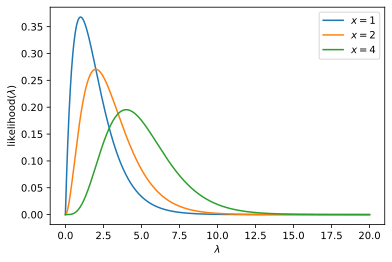

In [3]:
lambda_ = np.linspace(0,20, num = 500)
plt.plot(lambda_, poisson(1, lambda_), label = '$x = 1$')
plt.plot(lambda_, poisson(2, lambda_), label = '$x = 2$')
plt.plot(lambda_, poisson(4, lambda_), label = '$x = 4$')
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('likelihood($\lambda$)')